In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

## CountVectorizer
- 자연어에 대한 벡터화 진행

In [8]:
perfume_df = pd.read_csv("perfume_df.csv")

In [61]:
perfume_df = perfume_df.drop(columns="corpus1")

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
count_vect = CountVectorizer(stop_words='english', analyzer='word', max_df=20)
note_mat = count_vect.fit_transform(perfume_df["corpus"])
perfume_count = note_mat.toarray() # 데이터가 없는 곳에는 0으로 넣어주기
perfume_count_df = pd.DataFrame(perfume_count)

In [114]:
print((perfume_count_df.sum() > 30).value_counts())
col_idx = perfume_count_df.sum() > 30

False    12498
True        30
dtype: int64


In [115]:
perfume_count_df1 = perfume_count_df.loc[:,perfume_count_df.columns[col_idx]]

## Clustering

### AGNES : 계층적 클러스터링 알고리즘

In [116]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [117]:
n_clusters = [3,4,5, 6, 7, 8, 9, 10]

for num in n_clusters:
    HCA = AgglomerativeClustering(n_clusters = num, affinity = 'euclidean', linkage = 'ward',
                               compute_full_tree = True)
    cluster_labels = HCA.fit_predict(perfume_count_df1)
    S = metrics.silhouette_score(perfume_count_df1, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(num, S))

n_clusters = 3, silhouette score 0.685278
n_clusters = 4, silhouette score 0.605438
n_clusters = 5, silhouette score 0.535327
n_clusters = 6, silhouette score 0.537362
n_clusters = 7, silhouette score 0.545763
n_clusters = 8, silhouette score 0.553045
n_clusters = 9, silhouette score 0.520874
n_clusters = 10, silhouette score 0.526944


In [ ]:
n_clusters = [3,4,5, 6, 7, 8, 9, 10]

for num in n_clusters:
    HCA = AgglomerativeClustering(n_clusters = num, affinity = 'euclidean', linkage = 'ward',
                               compute_full_tree = True)
    cluster_labels = HCA.fit_predict(perfume_count_df1)
    S = metrics.silhouette_score(perfume_count_df1, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(num, S))

### k-means

In [121]:
from sklearn.cluster import KMeans

In [123]:
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in n_clusters:
    kmeans = KMeans(n_clusters = k, random_state = 42).fit(perfume_count_df1)
    cluster_labels = kmeans.predict(perfume_count_df1)
    S = metrics.silhouette_score(perfume_count_df1, cluster_labels)
    print(kmeans.inertia_)
    print("n_clusters = {:d}, silhouette score {:1f}".format(k, S))

4739.815602836866
n_clusters = 2, silhouette score 0.780117
4523.949290293046
n_clusters = 3, silhouette score 0.516595
4137.444713478613
n_clusters = 4, silhouette score 0.613756
3921.8456486042796
n_clusters = 5, silhouette score 0.537491
3732.056147832275
n_clusters = 6, silhouette score 0.544797
3534.007059105052
n_clusters = 7, silhouette score 0.553308
3487.544884250922
n_clusters = 8, silhouette score 0.494051


### DBSCAN

In [124]:
from sklearn.cluster import DBSCAN

In [154]:
dbscan = DBSCAN(eps=10, min_samples=50).fit(perfume_count_df1)

In [155]:
S = metrics.silhouette_score(perfume_count_df1, dbscan.labels_)
print("silhouette score {:1f}".format(S))

silhouette score 0.843286


In [162]:
from matplotlib import cm

def plotSilhouette(X, y_km):
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(X, y_km, metric="euclidean")
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('# of silhouette')
    plt.show()

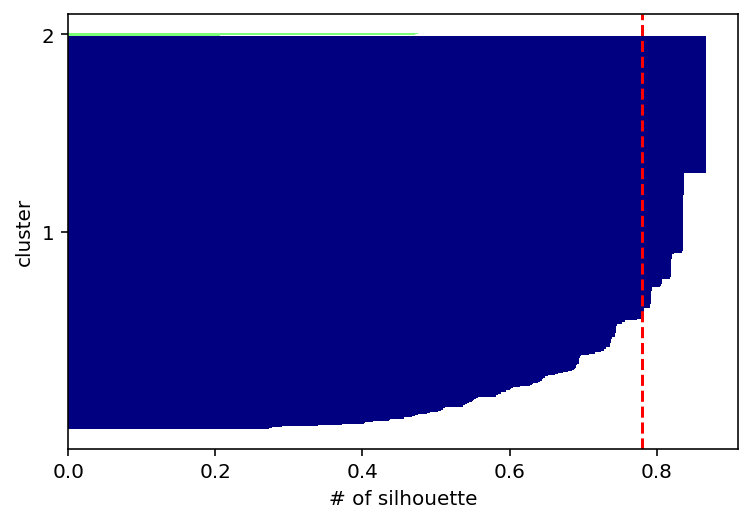

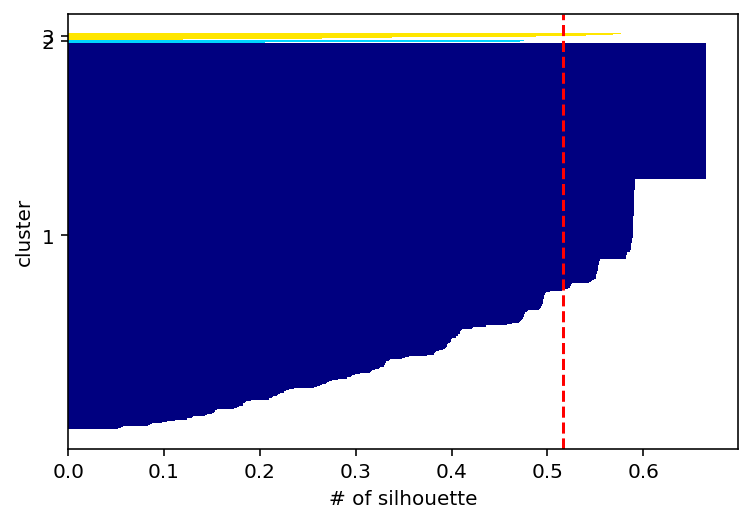

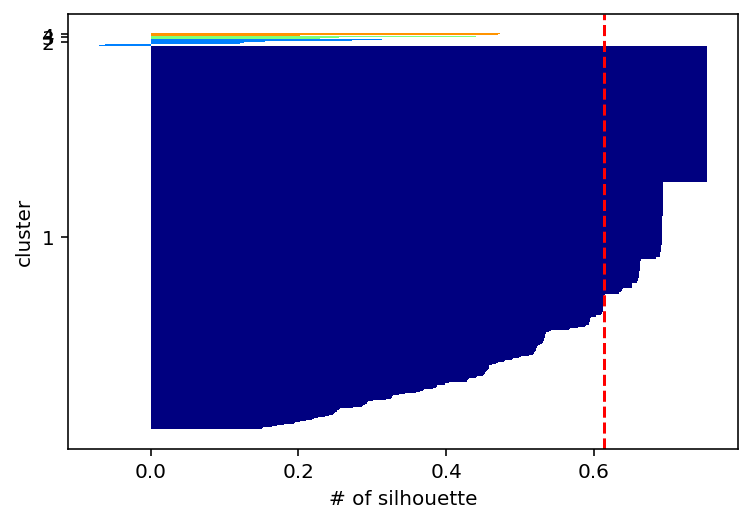

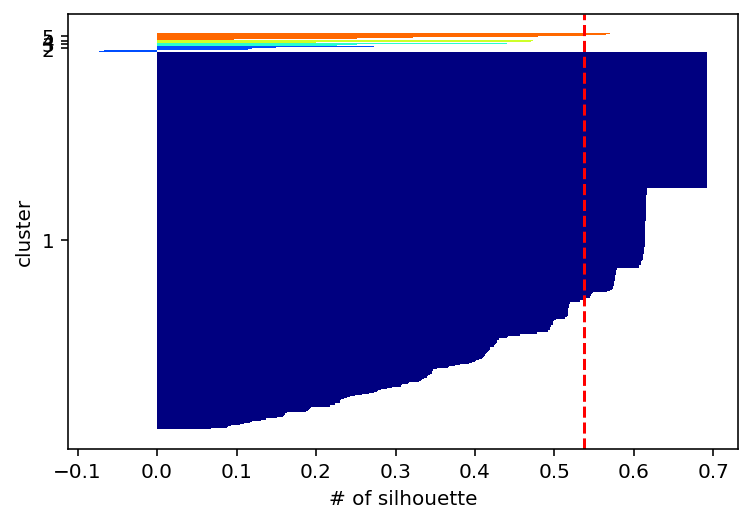

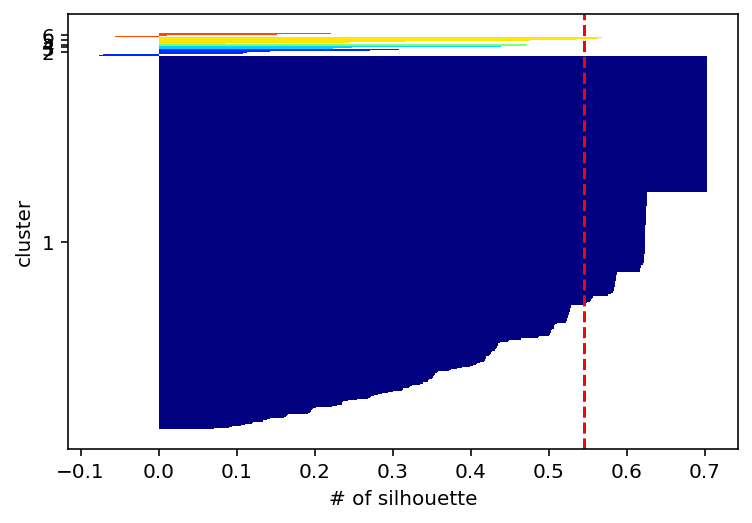

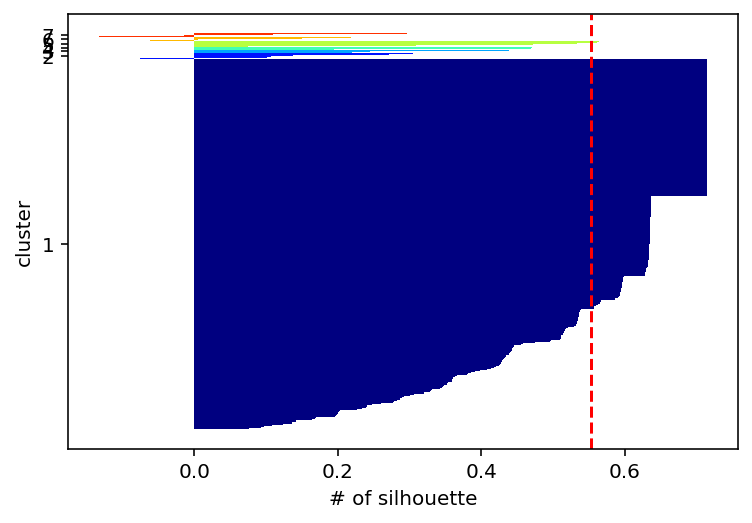

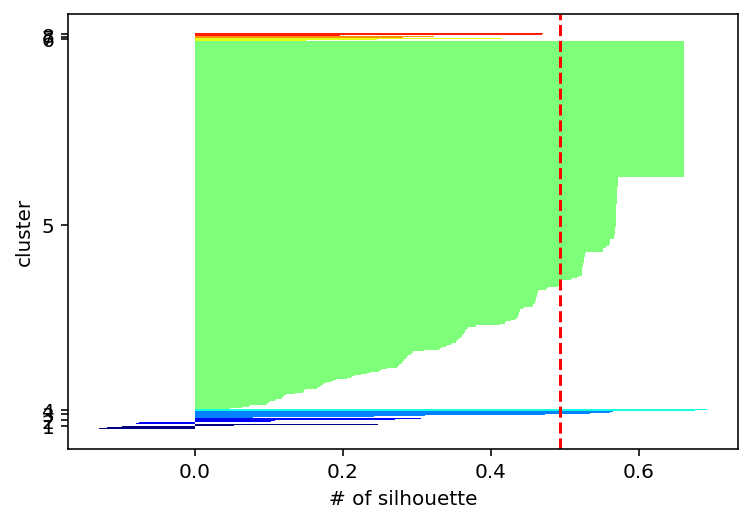

In [163]:
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in n_clusters:
    km = KMeans(n_clusters = k, random_state = 42)
    y_km = km.fit_predict(perfume_count_df1)
    plotSilhouette(perfume_count_df1, y_km)